In [1]:
from bowl import load_raw_data

data = load_raw_data()

train_labels.csv
test.csv
specs.csv
train.csv
sample_submission.csv


In [23]:
labels = data['train_labels.csv']

labels.loc[:, 'correct_ratio'] = labels.loc[:, 'num_correct'] / (labels.loc[:, 'num_incorrect'] + labels.loc[:, 'num_correct'])
labels.loc[:, 'correct_diff'] = labels.loc[:, 'num_correct'] - (labels.loc[:, 'num_incorrect'] + labels.loc[:, 'num_correct'])

labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,correct_ratio,correct_diff
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,1.0,0
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0,0.0,-11
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,1.0,0
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2,0.5,-1
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3,1.0,0


## Are some games harder?

In [16]:
#  most common accuracy group
labels.loc[:, 'accuracy_group'].value_counts()

3    8845
0    4229
1    2411
2    2205
Name: accuracy_group, dtype: int64

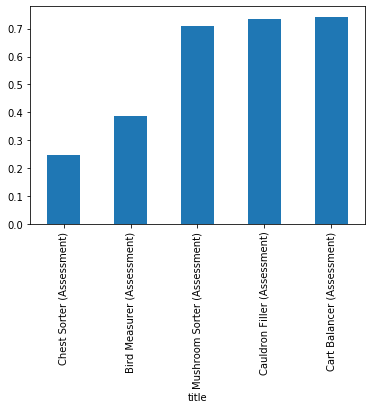

In [29]:
#  avg. accuracy per game
labels.groupby('title').mean().loc[:, 'accuracy'].sort_values().plot(kind='bar')

In [32]:
a = [0, 1, 2]
b = [0, 10, 20]

for a_, b_ in zip(a, b):
    print(a_, b_)

0 0
1 10
2 20


In [36]:
num_played.values

array([2746, 4151, 4055, 2981, 3757])

In [40]:
num_played = labels.groupby('title').count().loc[:, 'game_session']

for name in num_played.index:
    print(name)
    
for value in num_played.values:
    print(value)
    
name

Bird Measurer (Assessment)
Cart Balancer (Assessment)
Cauldron Filler (Assessment)
Chest Sorter (Assessment)
Mushroom Sorter (Assessment)
2746
4151
4055
2981
3757


'Mushroom Sorter (Assessment)'

In [51]:
name.split(' ')[:2] +  [' ' + str(100)]

['Mushroom', 'Sorter', ' 100']

In [50]:
''.join(name.split(' ')[:2] +  [' ' + str(100)])

'MushroomSorter 100'

In [52]:
new_cols = []
for name, value in zip(num_played.index, num_played.values):
    new_name = ''.join(name.split(' ')[:2] +  [' ' + str(value)])
    new_cols.append(new_name)
    
new_cols

['BirdMeasurer 2746',
 'CartBalancer 4151',
 'CauldronFiller 4055',
 'ChestSorter 2981',
 'MushroomSorter 3757']

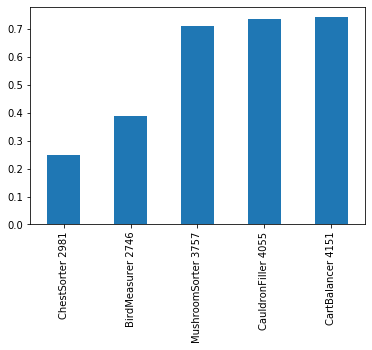

In [54]:
num_played.index = new_cols

grp = labels.groupby('title').mean()

grp.index = new_cols

grp.loc[:, 'accuracy'].sort_values().plot(kind='bar')

## 

In [15]:
labels.groupby(['title', 'accuracy_group']).describe()

num_correct                                    num_incorrect                                               accuracy                                                                      
                                                  count mean  std  min  25%  50%  75%  max         count      mean       std  min  25%  50%  75%   max    count      mean       std       min       25%       50%       75%       max
title                        accuracy_group                                                                                                                                                                                          
Bird Measurer (Assessment)   0                    886.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         886.0  5.962754  6.597874  1.0  2.0  4.0  8.0  85.0    886.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
                             1                    778.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         778.0  4.660668  3.825407  2.0  2.0  3.0  5.0  40.0    778.0  0.226533  0.089452  0.024390  0.166667  0.250000  0.333333  0.333333
                             2                    389.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         389.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0    389.0  0.500000  0.000000  0.500000  0.500000  0.500000  0.500000  0.500000
                             3                    693.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         693.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0    693.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
Cart Balancer (Assessment)   0                    576.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         576.0  2.607639  2.063061  1.0  1.0  2.0  4.0  14.0    576.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
                             1                    353.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         353.0  3.257790  2.216635  2.0  2.0  3.0  4.0  26.0    353.0  0.266308  0.074125  0.037037  0.200000  0.250000  0.333333  0.333333
                             2                    470.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         470.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0    470.0  0.500000  0.000000  0.500000  0.500000  0.500000  0.500000  0.500000
                             3                   2752.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        2752.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0   2752.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
Cauldron Filler (Assessment) 0                    421.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         421.0  3.902613  5.704845  1.0  1.0  2.0  4.0  49.0    421.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
                             1                    459.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         459.0  3.400871  2.615974  2.0  2.0  2.0  4.0  23.0    459.0  0.267104  0.079268  0.041667  0.200000  0.333333  0.333333  0.333333
                             2                    630.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         630.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0    630.0  0.500000  0.000000  0.500000  0.500000  0.500000  0.500000  0.500000
                             3                   2545.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        2545.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0   2545.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
Chest Sorter (Assessment)    0                   1752.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        1752.0  3.681507  3.416649  1.0  2.0  3.0  5.0  50.0   1752.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
                             1                    466.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         466.0  4.360515  3.275662  2.0  2.0  3.0  5.0  39.0    466.0  0.227794  0.084466  0.025000  0.166667  0.250000  0.333333  0.333333
                             2                    256.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         256.0  1.000000  0.000000  1.0  1.0

In [6]:
labels.groupby('title').sum()

,num_correct,num_incorrect,accuracy,accuracy_group
title,,,,
Bird Measurer (Assessment),1860,9298,1063.742560,3635
Cart Balancer (Assessment),3575,3122,3081.006889,9549
Cauldron Filler (Assessment),3634,3834,2982.600942,9354
Chest Sorter (Assessment),1229,8738,741.152177,2499
Mushroom Sorter (Assessment),3163,3096,2671.384607,8319


In [12]:
labels.loc[:, 'accuracy_group'].value_counts()

3    8845
0    4229
1    2411
2    2205
Name: accuracy_group, dtype: int64